In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
fichier_archive = 'gdrive/MyDrive/deep_learning_course-main/data/archive.zip'

In [4]:
!unzip '/gdrive/MyDrive/deep_learning_course-main/data/archive.zip'

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATAS

In [5]:
import os

In [6]:
data_dir = "DATASET"

In [7]:
train_dir = os.path.join(data_dir, "TRAIN")
test_dir = os.path.join(data_dir, "TEST")

In [8]:
os.listdir(train_dir)

['R', 'O']

In [9]:
train_r_dir = os.path.join(train_dir, "R")
train_o_dir = os.path.join(train_dir, "O")

In [10]:
len(os.listdir(train_r_dir))

9999

In [11]:
len(os.listdir(train_o_dir))

12565

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [13]:
r_index = 5680
o_index = 1496

recyclable_imgs = [os.path.join(train_r_dir, filename) for filename in os.listdir(train_r_dir)]
organic_imgs = [os.path.join(train_o_dir, filename) for filename in os.listdir(train_o_dir)]

img_r = mpimg.imread(recyclable_imgs[r_index])
img_o = mpimg.imread(organic_imgs[o_index])

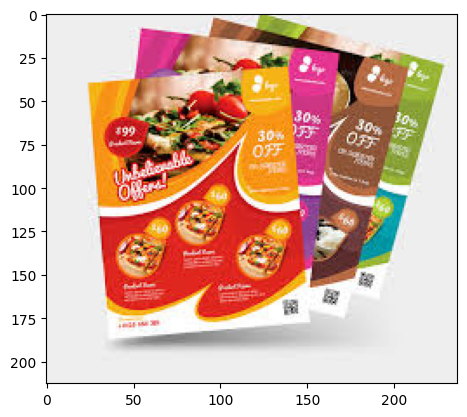

In [14]:
plt.imshow(img_r)

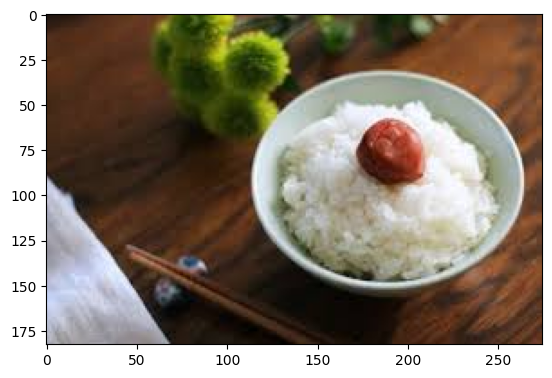

In [15]:
plt.imshow(img_o)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_data_generator = ImageDataGenerator(rescale=1/255.0)

test_data_generator = ImageDataGenerator(rescale=1/255.0)

In [18]:
train_generator = train_data_generator.flow_from_directory(
    directory = train_dir,
    target_size = (224, 224),
    batch_size=32,
    class_mode="binary"

)


test_generator = test_data_generator.flow_from_directory(
    directory = test_dir,
    target_size = (224, 224),
    batch_size=32,
    class_mode="binary"

)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
batch_images, batch_labels = next(iter(train_generator))

In [ ]:

batch_images.shape

(32, 224, 224, 3)

In [ ]:
batch_labels.shape

(32,)

In [ ]:
train_generator.class_indices

{'O': 0, 'R': 1}

In [ ]:
batch_images[2].shape

(224, 224, 3)

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([

    #Extraction de caractéristiques
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation='relu', input_shape=(224, 224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    # applatir
    tf.keras.layers.Flatten(),

    # Dense
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid"),
                ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 110, 110, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 55, 55, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 53, 53, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,600,385 (9.92 MB)

 Trainable params: 2,600,385 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="premier_modele.keras",
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=6, restore_best_weights=True)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [ ]:
h = model.fit(train_generator, epochs=50,
             validation_data=test_generator,
             callbacks = [model_ckp])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


706/706 ━━━━━━━━━━━━━━━━━━━━ 58s 72ms/step - accuracy: 0.7685 - loss: 0.5247 - val_accuracy: 0.8750 - val_loss: 0.3295
Epoch 2/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 43s 61ms/step - accuracy: 0.8366 - loss: 0.3893 - val_accuracy: 0.8850 - val_loss: 0.3069
Epoch 3/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - accuracy: 0.8561 - loss: 0.3506 - val_accuracy: 0.8782 - val_loss: 0.3250
Epoch 4/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - accuracy: 0.8714 - loss: 0.3238 - val_accuracy: 0.8977 - val_loss: 0.2780
Epoch 5/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - accuracy: 0.8832 - loss: 0.2952 - val_accuracy: 0.9037 - val_loss: 0.2592
Epoch 6/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - accuracy: 0.8931 - loss: 0.2732 - val_accuracy: 0.9164 - val_loss: 0.2490
Epoch 7/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - accuracy: 0.9006 - loss: 0.2538 - val_accuracy: 0.9105 - val_loss: 0.2716
Epoch 8/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.9186 - loss: 0.2194 - val_accurac

# tracer l'évolution de loss et val loss et l'accuracy et val accuracy dans une figure


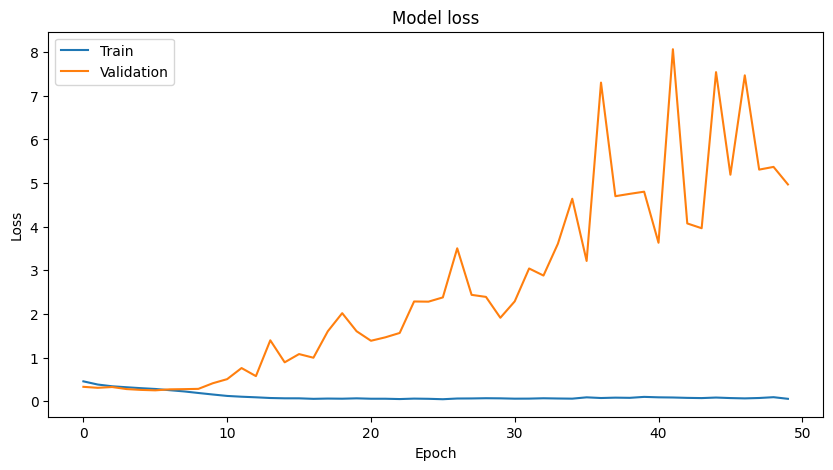

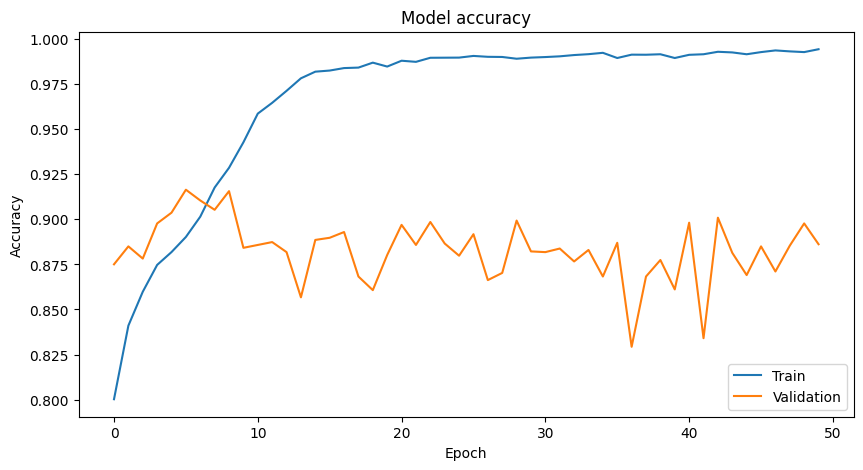

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# code pour eviter l'overfitting-application de l'EarlyStopping

Augmentation de la data

In [19]:
# avant augmentation
train_data_generator = ImageDataGenerator(rescale=1/255.0)
test_data_generator = ImageDataGenerator(rescale=1/255.0)


# après augmentation
train_data_generator = ImageDataGenerator(rescale=1/255.0,
                                          rotation_range=40,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          fill_mode="nearest")
test_data_generator = ImageDataGenerator(rescale=1/255.0)

In [20]:
train_generator = train_data_generator.flow_from_directory(
    directory = train_dir,
    target_size = (224, 224),
    batch_size=32,
    class_mode="binary"

)


test_generator = test_data_generator.flow_from_directory(
    directory = test_dir,
    target_size = (224, 224),
    batch_size=32,
    class_mode="binary"

)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


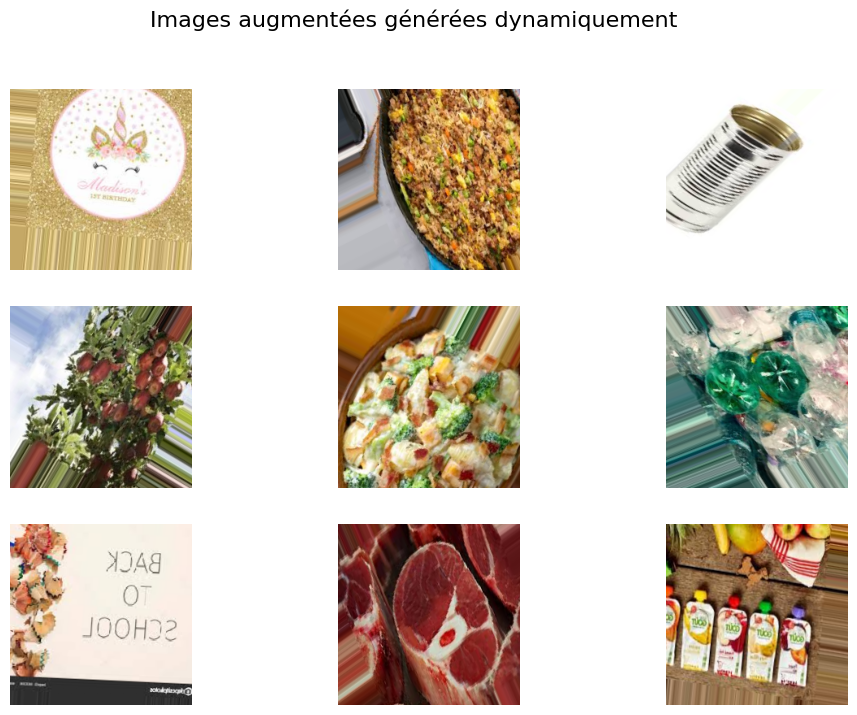

In [23]:
import matplotlib.pyplot as plt

# Générer un batch d'images augmentées
sample_images, _ = next(train_generator)

# Afficher quelques exemples
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.axis('off')
plt.suptitle("Images augmentées générées dynamiquement", fontsize=16)
plt.show()


ajout de droupout et L2

In [ ]:
from tensorflow.keras.regularizers import l2

model = tf.keras.models.Sequential([

    # Extraction de caractéristiques avec L2
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation='relu',
                            kernel_initializer='he_normal', kernel_regularizer=l2(0.01), input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu",
                            kernel_initializer='he_normal', kernel_regularizer=l2(0.01)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu",
                            kernel_initializer='he_normal', kernel_regularizer=l2(0.01)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu",
                            kernel_initializer='he_normal', kernel_regularizer=l2(0.01)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Applatir
    tf.keras.layers.Flatten(),

    # Dense avec Dropout et L2
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer='he_normal', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.5),  # Dropout pour réduire le surapprentissage
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])


changement de learning rate 0.001 --> 0.0001 et application de l'earlystop

In [ ]:
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="deuxieme_modele.keras",
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=6, restore_best_weights=True)
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [ ]:
h = model.fit(train_generator, epochs=50,
             validation_data=test_generator,
             callbacks = [model_ckp, stop])

Epoch 1/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 283s 398ms/step - accuracy: 0.7916 - loss: 4.2153 - val_accuracy: 0.8731 - val_loss: 2.0837
Epoch 2/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 275s 386ms/step - accuracy: 0.8063 - loss: 1.9679 - val_accuracy: 0.8758 - val_loss: 1.4816
Epoch 3/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 322s 385ms/step - accuracy: 0.8150 - loss: 1.4888 - val_accuracy: 0.8822 - val_loss: 1.2208
Epoch 4/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 277s 388ms/step - accuracy: 0.8165 - loss: 1.2664 - val_accuracy: 0.8313 - val_loss: 1.1515
Epoch 5/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 322s 390ms/step - accuracy: 0.8238 - loss: 1.1216 - val_accuracy: 0.8591 - val_loss: 0.9998
Epoch 6/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 273s 384ms/step - accuracy: 0.8236 - loss: 1.0313 - val_accuracy: 0.8766 - val_loss: 0.9148
Epoch 7/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 326s 389ms/step - accuracy: 0.8261 - loss: 0.9714 - val_accuracy: 0.8794 - val_loss: 0.8527
Epoch 8/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 275s 386ms/step - accuracy: 0.8247 -

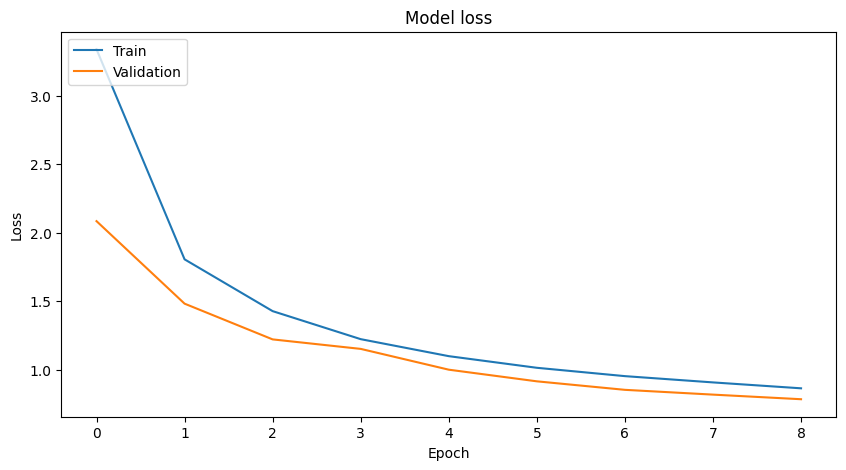

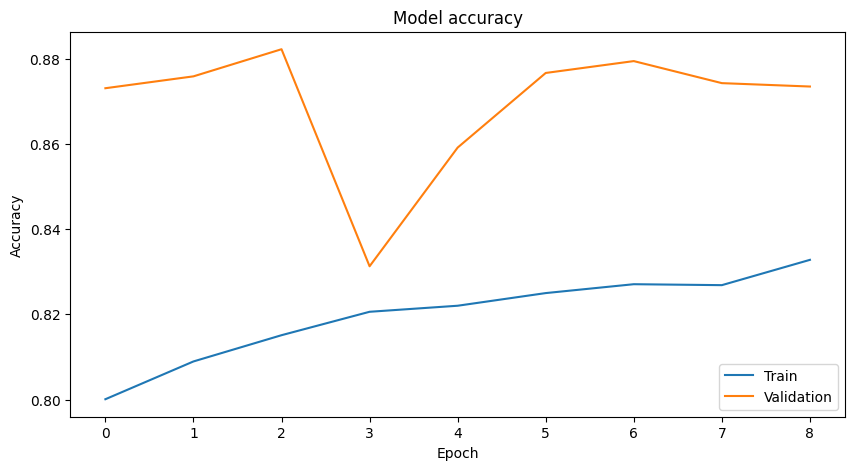

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()